In [ ]:
pip install mp_api

In [1]:
	pip install pymatgen



*  Get ALL material Id from chemsys
*  From given material id filter ou the ones with space group
*  Now from all the filtered material ids get their energy above hull all properties

In [2]:
from mp_api.client import MPRester
with MPRester(api_key="Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8") as mpr:
    chemsys_formula = "Li-Fe-O"
    final_structures = mpr.get_structures(chemsys_formula, final=True)
print(final_structures)

Retrieving MaterialsDoc documents:   0%|          | 0/176 [00:00<?, ?it/s]

[Structure Summary
Lattice
    abc : 5.199971280910021 5.199971280910021 9.85218880210007
 angles : 84.52650197900472 84.52650197900472 121.56524009055953
 volume : 222.60892248784967
      A : 4.5384 2.538233 0.0
      B : -4.5384 2.538233 0.0
      C : 0.0 1.925235 9.662251
    pbc : True True True
PeriodicSite: Li (-0.7275, 4.292, 2.311) [0.6746, 0.8349, 0.2392]
PeriodicSite: Li (-0.7275, 2.71, 7.351) [0.1651, 0.3254, 0.7608]
PeriodicSite: Li (-3.795, 2.538, 0.0) [0.08189, 0.9181, 0.0]
PeriodicSite: Fe (3.804, 3.501, 4.831) [0.9191, 0.08092, 0.5]
PeriodicSite: Fe (-2.31, 1.77, 2.294) [0.004072, 0.5131, 0.2374]
PeriodicSite: Fe (2.214, 2.538, 0.0) [0.7439, 0.2561, 0.0]
PeriodicSite: Fe (-2.31, 5.232, 7.368) [0.4869, 0.9959, 0.7626]
PeriodicSite: Fe (0.7588, 3.501, 4.831) [0.5836, 0.4164, 0.5]
PeriodicSite: Fe (-0.6642, 2.538, 0.0) [0.4268, 0.5732, 0.0]
PeriodicSite: Fe (-2.29, 3.501, 4.831) [0.2477, 0.7523, 0.5]
PeriodicSite: O (2.331, 4.309, 5.943) [0.8724, 0.3588, 0.615]
PeriodicSi

In [4]:
from pymatgen.ext.matproj import MPRester
from pprint import pprint

# Initializing MPRester. Note that you can call MPRester. MPRester looks for the API key in two places:
# - Supplying it directly as an __init__ arg.
# - Setting the "MAPI_KEY" environment variable.
# Please obtain your API key at https://www.materialsproject.org/dashboard

m = MPRester("Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8")
material_ids = m.get_material_ids(chemsys_formula="*3O4")
print(material_ids[0])
mpid = material_ids[0]
with MPRester(api_key="Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8") as mpr:
    docs = mpr.summary.search(material_ids=[mpid], fields=["energy_above_hull", "composition", "symmetry"])
    symmetry_data = docs[0].symmetry
    comp = docs[0].composition


    energy_above_hull = docs[0].energy_above_hull
print(comp)
print(type(symmetry_data))
crystal_system = symmetry_data.crystal_system
plane_group = symmetry_data.point_group

print("Crystal System:", crystal_system)
print("Plane Group:", plane_group)

Retrieving MaterialsDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

mp-1604


<ipython-input-4-734ff5e4c58c>:14: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=[mpid], fields=["energy_above_hull", "composition", "symmetry"])


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Pt6 O8
<class 'emmet.core.symmetry.SymmetryData'>
Crystal System: Cubic
Plane Group: m-3m


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
def get_material_data(api_key, element_pair):
    with MPRester(api_key) as mpr:
        material_ids = mpr.get_material_ids(element_pair)

        data = {
            "material_id": [],
            "symmetry": [],
            "composition": [],
            "formula_pretty": [],
            "energy_above_hull": [],
            "energy_per_atom": [],
            "formation_energy_per_atom": [],
            "nsites": [],
            "elements": [],
            "nelements": [],

        }

        for mpid in material_ids:
            with MPRester(api_key=api_key) as mpr:
                docs = mpr.summary.search(material_ids=[mpid],
                                          fields=["nsites", "elements", "nelements", "composition_reduced",
                                                  "formula_anonymous", "chemsys", "volume", "density",
                                                  "density_atomic", "property_name", "deprecated",
                                                  "deprecation_reasons", "last_updated", "origins", "warnings",
                                                  "structure", "task_ids", "uncorrected_energy_per_atom",
                                                  "is_stable", "equilibrium_reaction_energy_per_atom",
                                                  "decomposes_to", "xas", "grain_boundaries", "band_gap", "cbm",
                                                  "vbm", "efermi", "is_gap_direct", "is_metal", "es_source_calc_id",
                                                  "bandstructure", "dos", "dos_energy_up", "dos_energy_down",
                                                  "is_magnetic", "ordering", "total_magnetization",
                                                  "total_magnetization_normalized_vol",
                                                  "total_magnetization_normalized_formula_units",
                                                  "num_magnetic_sites", "num_unique_magnetic_sites",
                                                  "types_of_magnetic_species", "bulk_modulus", "shear_modulus",
                                                  "universal_anisotropy", "homogeneous_poisson", "e_total", "e_ionic",
                                                  "e_electronic", "n", "e_ij_max", "weighted_surface_energy_EV_PER_ANG2",
                                                  "weighted_surface_energy", "weighted_work_function", "surface_anisotropy",
                                                  "shape_factor", "has_reconstructed", "possible_species", "has_props",
                                                  "theoretical", "database_IDs", "symmetry""energy_above_hull", "composition", "symmetry", "formula_pretty",
                                                  "energy_per_atom", "formation_energy_per_atom"])

                data["material_id"].append(mpid)
                data["symmetry"].append(docs[0].symmetry)
                data["composition"].append(docs[0].composition)
                data["formula_pretty"].append(docs[0].formula_pretty)
                data["energy_above_hull"].append(docs[0].energy_above_hull)
                data["energy_per_atom"].append(docs[0].energy_per_atom)
                data["formation_energy_per_atom"].append(docs[0].formation_energy_per_atom)


                data["nsites"].append(docs[0].nsites)
                data["elements"].append(docs[0].elements)
                data["nelements"].append(docs[0].nelements)


        df = pd.DataFrame(data)
        return df


api_key = "Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8" # you might want to change this
element_pair = "Ni-Cu"

df = get_material_data(api_key, element_pair)
print(df)

Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

<ipython-input-7-05416ce042d3>:23: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=[mpid],


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

  material_id                                           symmetry composition  \
0  mp-1184054  crystal_system=<CrystalSystem.tet: 'Tetragonal...    (Cu, Ni)   
1  mp-1184069  crystal_system=<CrystalSystem.hex_: 'Hexagonal...    (Cu, Ni)   
2  mp-1225687  crystal_system=<CrystalSystem.trig: 'Trigonal'...    (Cu, Ni)   
3  mp-1225694  crystal_system=<CrystalSystem.ortho: 'Orthorho...    (Cu, Ni)   
4  mp-1225695  crystal_system=<CrystalSystem.ortho: 'Orthorho...    (Cu, Ni)   
5  mp-1225698  crystal_system=<CrystalSystem.ortho: 'Orthorho...    (Cu, Ni)   

  formula_pretty energy_above_hull  energy_per_atom  \
0          CuNi3              None       -11.654967   
1           CuNi              None       -11.354573   
2           CuNi              None       -11.372828   
3          CuNi3              None       -11.605828   
4           CuNi              None       -11.321159   
5          Cu3Ni              None       -11.071338   

   formation_energy_per_atom  nsites  elements  nelem

In [ ]:
for mpid in material_ids:
  with MPRester(api_key="Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8") as mpr:
    docs = mpr.summary.search(material_ids=[mpid], fields=["energy_above_hull", "composition", "symmetry"])
    symmetry = docs[0].symmetry

    energy_above_hull = docs[0].energy_above_hull
  print(symmetry)

<ipython-input-38-38f206a735e0>:3: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=[mpid], fields=["energy_above_hull", "composition", "symmetry"])


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.cubic: 'Cubic'> symbol='Pm-3n' number=223 point_group='m-3m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='P2_1/c' number=14 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Cmcm' number=63 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.cubic: 'Cubic'> symbol='Fd-3m' number=227 point_group='m-3m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tet: 'Tetragonal'> symbol='I4_1/amd' number=141 point_group='4/mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.cubic: 'Cubic'> symbol='Fd-3m' number=227 point_group='m-3m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbam' number=55 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tet: 'Tetragonal'> symbol='P4_2/mbc' number=135 point_group='4/mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Imma' number=74 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pmma' number=51 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.cubic: 'Cubic'> symbol='Im-3m' number=229 point_group='m-3m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.cubic: 'Cubic'> symbol='F-43m' number=216 point_group='-43m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='Cm' number=8 point_group='m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbam' number=55 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='Pm' number=6 point_group='m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Cmmm' number=65 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pmc2_1' number=26 point_group='mm2' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Cmc2_1' number=36 point_group='mm2' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.trig: 'Trigonal'> symbol='R-3m' number=166 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='C2/m' number=12 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='C2/m' number=12 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pmna' number=53 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='C2/m' number=12 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Cmmm' number=65 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='C2/c' number=15 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='P2/c' number=13 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pmma' number=51 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.cubic: 'Cubic'> symbol='Fm-3m' number=225 point_group='m-3m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Ibam' number=72 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tet: 'Tetragonal'> symbol='P4/mnc' number=128 point_group='4/mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='P2_1' number=4 point_group='2' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='P2/m' number=10 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='P2/m' number=10 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='Pc' number=7 point_group='m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='P2/m' number=10 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pmc2_1' number=26 point_group='mm2' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='Pm' number=6 point_group='m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tri: 'Triclinic'> symbol='P1' number=1 point_group='1' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pnma' number=62 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tri: 'Triclinic'> symbol='P1' number=1 point_group='1' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pbcm' number=57 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Cmcm' number=63 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tet: 'Tetragonal'> symbol='I4/mmm' number=139 point_group='4/mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='C2' number=5 point_group='2' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Imma' number=74 point_group='mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.trig: 'Trigonal'> symbol='R-3m' number=166 point_group='-3m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='C2/c' number=15 point_group='2/m' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tet: 'Tetragonal'> symbol='I4_1/amd' number=141 point_group='4/mmm' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tri: 'Triclinic'> symbol='P1' number=1 point_group='1' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.ortho: 'Orthorhombic'> symbol='Pmc2_1' number=26 point_group='mm2' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.tri: 'Triclinic'> symbol='P-1' number=2 point_group='-1' symprec=0.1 version='2.0.2'


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

crystal_system=<CrystalSystem.mono: 'Monoclinic'> symbol='Pm' number=6 point_group='m' symprec=0.1 version='2.0.2'


In [ ]:
list_of_available_fields = mpr.summary.available_fields
print(list_of_available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

<ipython-input-37-6c12413ab4e7>:1: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  list_of_available_fields = mpr.summary.available_fields


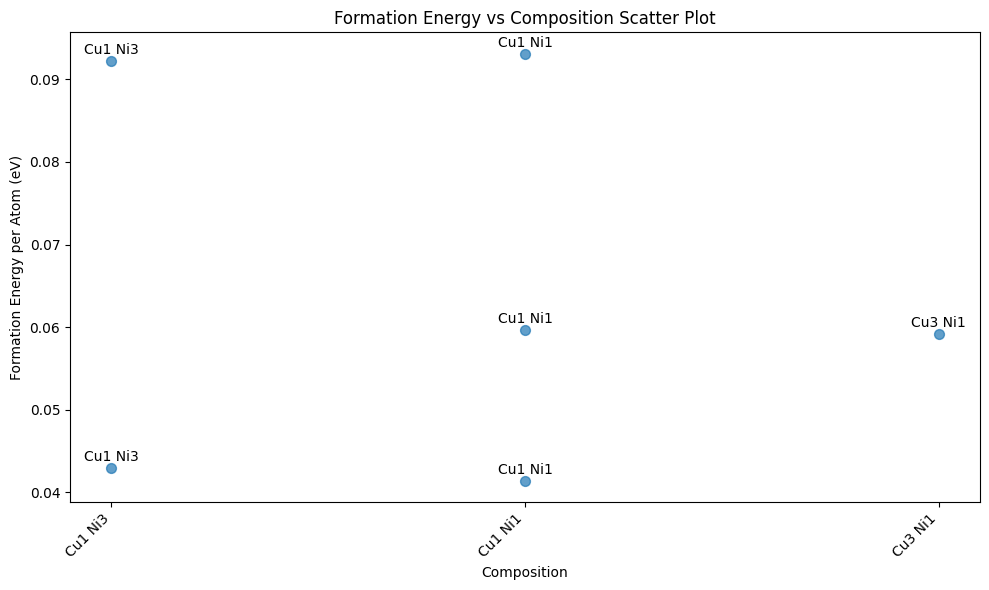

In [8]:
def plot_formation_energy_vs_composition(df):

    formation_energy = df["formation_energy_per_atom"]
    compositions = df["composition"]


    composition_labels = [str(comp) for comp in compositions]


    plt.figure(figsize=(10, 6))
    plt.scatter(composition_labels, formation_energy, s=50, alpha=0.7)


    for i, label in enumerate(composition_labels):
        plt.annotate(label, (composition_labels[i], formation_energy.iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')


    plt.xlabel("Composition")
    plt.ylabel("Formation Energy per Atom (eV)")
    plt.title("Formation Energy vs Composition Scatter Plot")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()


plot_formation_energy_vs_composition(df)

In [ ]:
material_ids = mpr.get_material_ids(chemsys_formula="*3O4")
input_string = material_ids[0]
start_index = input_string.find("(")
end_index = input_string.find(")")

# Extract the material ID
material_id = input_string[start_index + 1:end_index]

# Print the result
print(material_id)

Retrieving MaterialsDoc documents:   0%|          | 0/58 [00:00<?, ?it/s]

mp-160


In [ ]:

with MPRester(api_key="Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8") as mpr:
    docs = mpr.summary.search(material_ids=["mp-148"], fields=["energy_above_hull"])
    structure = docs[0].energy_above_hull
print(structure)

<ipython-input-18-fd1425a52be1>:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=["mp-148"], fields=["energy_above_hull"])


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

0.24310949500000056


In [ ]:
import os
import requests
mp_api_key = 'Xu1NqFMbAbfYegT6Sx4p5cy48KZEZxz8'
response = requests.get("https://api.materialsproject.org/materials/mp-149/?fields=material_id%2Cstructure&all_fields=false", headers={"X-API-KEY": mp_api_key})

print(response.text)

{"detail":"Not Found"}


In [ ]:
from pymatgen.core.structure import Structure
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import Molecule


In [11]:
import numpy as np

def calculate_derived_quantities(band_gaps):
    # Convert band_gaps to a NumPy array
    band_gaps_array = np.array(band_gaps)

    boltzmann_constant = 8.617333262145e-5  # eV/K, Boltzmann constant
    temperature = 300  # K, room temperature

    conductivity = np.exp(-band_gaps_array / (2 * boltzmann_constant * temperature))

    intrinsic_carrier_concentration = 2 * ((2 * np.pi * boltzmann_constant * temperature) / (6.62607015e-34))**1.5 * np.exp(-band_gaps_array / (2 * boltzmann_constant * temperature))

    effective_mass = (1 / (2 * np.pi))**2 * (np.gradient(band_gaps_array) / np.gradient(np.square(band_gaps_array)))

    return {
        "conductivity": conductivity,
        "intrinsic_carrier_concentration": intrinsic_carrier_concentration,
        "effective_mass": effective_mass
    }

# Example use case:
band_gaps_list = [1.2, 0.8, 1.5, 0.5]  # Example band gap values in eV for different materials
derived_data = calculate_derived_quantities(band_gaps_list)

# Display the results
print("Derived Quantities:")
print("Electrical Conductivity:", derived_data["conductivity"])
print("Intrinsic Carrier Concentration:", derived_data["intrinsic_carrier_concentration"])
print("Effective Mass of Charge Carriers:", derived_data["effective_mass"])


Derived Quantities:
Electrical Conductivity: [8.32613847e-11 1.90675877e-07 2.51509583e-13 6.31225951e-05]
Intrinsic Carrier Concentration: [6.39146771e+38 1.46370219e+42 1.93068537e+36 4.84553589e+44]
Effective Mass of Charge Carriers: [0.01266515 0.00938159 0.01948484 0.01266515]


In [14]:
def get_pure_element_data(api_key, chemsys):
    with MPRester(api_key) as mpr:
        elements = chemsys.split('-')  # Extract elements from chemsys

        data = {
            "material_id": [],
            "symmetry": [],
            "composition": [],
            "formula_pretty": [],
            "energy_above_hull": [],
            "energy_per_atom": [],
            "formation_energy_per_atom": []
            # Add other properties as needed
        }
        df = pd.DataFrame(data)

        for element in elements:
            element_composition = {element: 1}  # Pure element composition
            element_data = get_material_data(api_key, element_composition)
            df = df.append(element_data, ignore_index=True)

        return df
pure_element_data = get_pure_element_data(api_key, "Ni-Cu")

# Display the retrieved data
print("Material Data for Pure Elements in Chemsys:")
print(pure_element_data)

Retrieving MaterialsDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

<ipython-input-7-05416ce042d3>:23: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=[mpid],


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-14-3b53c320fb84>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(element_data, ignore_index=True)


Retrieving MaterialsDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

<ipython-input-7-05416ce042d3>:23: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(material_ids=[mpid],


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Material Data for Pure Elements in Chemsys:
   material_id                                           symmetry composition  \
0        mp-23  crystal_system=<CrystalSystem.cubic: 'Cubic'> ...        (Ni)   
1     mp-10257  crystal_system=<CrystalSystem.hex_: 'Hexagonal...        (Ni)   
2   mp-1008728  crystal_system=<CrystalSystem.cubic: 'Cubic'> ...        (Ni)   
3   mp-1014111  crystal_system=<CrystalSystem.trig: 'Trigonal'...        (Ni)   
4   mp-1094136  crystal_system=<CrystalSystem.hex_: 'Hexagonal...        (Ni)   
5   mp-1246134  crystal_system=<CrystalSystem.hex_: 'Hexagonal...        (Ni)   
6        mp-30  crystal_system=<CrystalSystem.cubic: 'Cubic'> ...        (Cu)   
7    mp-989695  crystal_system=<CrystalSystem.hex_: 'Hexagonal...        (Cu)   
8    mp-989782  crystal_system=<CrystalSystem.hex_: 'Hexagonal...        (Cu)   
9    mp-998890  crystal_system=<CrystalSystem.cubic: 'Cubic'> ...        (Cu)   
10  mp-1010136  crystal_system=<CrystalSystem.tet: 'Tetragonal...

<ipython-input-14-3b53c320fb84>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(element_data, ignore_index=True)


In [15]:
def export_to_csv(df, filename='materials_data.csv'):
    df.to_csv(filename, index=False)

In [16]:
def compare_materials(api_key, material_ids):
    details = [get_material_properties(api_key, m_id) for m_id in material_ids]

    # Extract band gaps for comparison
    band_gaps = [material['band_gap'] for material in details]

    # Simple comparison: Find the material with the maximum band gap
    max_band_gap = max(band_gaps)
    max_band_gap_material = details[band_gaps.index(max_band_gap)]


    return max_band_gap_material

In [ ]:
# Making lattices
lattice = Lattice([[2.8, 0, 0], [0, 2.8, 0], [0, 0, 2.8]])
lattice = Lattice.from_parameters(a=2.8, b=2.8, c=2.8, alpha=90, beta=90, gamma=90)
lattice.cubic(2.8)

lattice.hexagonal(a = 2.8, c = 3.6)
lattice.rhombohedral(a = 2.8, alpha = 60)

# Getting lattice info
print("a = ", lattice.a)
print("alpha = ", lattice.alpha)
print("volume = ", lattice.volume)

a =  2.8
alpha =  90.0
volume =  21.951999999999995


In [ ]:
bcc_fe = Structure(lattice, ["Fe", "Fe"], [[0, 0, 0], [0.5, 0.5, 0.5]])
site0 = bcc_fe[0]
site0.coords
site0.species_string
site0.x

bcc_fe = Structure.from_spacegroup("Im-3m", Lattice.cubic(2.8), ["Fe"], [[0, 0, 0]])
print(bcc_fe)
nacl= Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.692), ["Na+", "Cl-"],
                                [[0, 0, 0], [0.5, 0.5, 0.5]])
big_structure = Structure.from_file("/content/Nb2O5.cif")
big_structure.formula

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.800000   2.800000   2.800000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5


/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1186: UserWarning: The default value of primitive was changed from True to False in https://github.com/materialsproject/pymatgen/pull/3419. CifParser now returns the cell in the CIF file as is. If you want the primitive cell, please set primitive=True explicitly.
  warnings.warn(


'Nb16 O40'

In [ ]:
with MPRester(mp_api_key) as mpr:
  print('Exact Na formula matches are: ', mpr.get_materials_ids("Na"))
  print('All compunds in the Na system are: ', mpr.get_materials_ids('Na'))
mpr = MPRester(mp_api_key)

Retrieving MaterialsDoc documents:   0%|          | 0/14 [00:00<?, ?it/s]

Exact Na formula matches are:  [MPID(mp-127), MPID(mp-10172), MPID(mp-567772), MPID(mp-689577), MPID(mp-973198), MPID(mp-974558), MPID(mp-974920), MPID(mp-982370), MPID(mp-999501), MPID(mp-1079952), MPID(mp-1186040), MPID(mp-1186055), MPID(mp-1186081), MPID(mp-1221597)]


Retrieving MaterialsDoc documents:   0%|          | 0/14 [00:00<?, ?it/s]

All compunds in the Na system are:  [MPID(mp-127), MPID(mp-10172), MPID(mp-567772), MPID(mp-689577), MPID(mp-973198), MPID(mp-974558), MPID(mp-974920), MPID(mp-982370), MPID(mp-999501), MPID(mp-1079952), MPID(mp-1186040), MPID(mp-1186055), MPID(mp-1186081), MPID(mp-1221597)]


In [ ]:
from pymatgen.ext.matproj import MPRester
import pymatgen.core as mg

si = mg.Element('Si')
print(si.atomic_mass)

28.0855 amu


In [ ]:
# Making disordered structures
specie = {"Cu0+": 0.5, "Au0+":0.5}
cu_au = Structure.from_spacegroup("Fm-3m", Lattice.cubic(3.677), [specie], [[0, 0, 0]])
print(cu_au)

Full Formula (Cu2 Au2)
Reduced Formula: CuAu
abc   :   3.677000   3.677000   3.677000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (4)
  #  SP                        a    b    c
---  ----------------------  ---  ---  ---
  0  Cu0+:0.500, Au0+:0.500  0    0    0
  1  Cu0+:0.500, Au0+:0.500  0.5  0.5  0
  2  Cu0+:0.500, Au0+:0.500  0.5  0    0.5
  3  Cu0+:0.500, Au0+:0.500  0    0.5  0.5


In [ ]:
# Manipulating structures and assigning properties to sites
big_structure[0] = "V"
big_structure.formula
big_structure[0] = "Nb"

bcc_fe.append("C", [0.25, 0.25, 0.25])
bcc_fe.pop(-1)
bcc_fe.make_supercell([2, 2, 2])

sd = []
names = []
for site in big_structure:
    if site.species_string == "Nb":
        sd.append([False, False, False])
    else:
        sd.append([True, True, True])
big_structure.add_site_property("selective_dynamics", sd)
big_structure.to(filename="POSCAR")

'Nb16 O40\n1.0\n   3.8315559572580451    0.0000000000000000   -0.4830497042297771\n  -2.4195715873602603   14.0128838694758873   -3.7826297885999489\n   0.0000000000000000    0.0000000000000000   15.4363782799999996\nNb O\n16 40\nSelective dynamics\ndirect\n   0.1696370000000000    0.2470740000000000    0.0964280000000000 F F F Nb\n   0.3058030000000000    0.5118730000000000    0.0975570000000000 F F F Nb\n   0.9611030000000000    0.0230030000000000    0.8988030000000000 F F F Nb\n   0.3290790000000000    0.3289640000000000    0.3711220000000000 F F F Nb\n   0.6362610000000000    0.6720900000000000    0.6289180000000000 F F F Nb\n   0.8280760000000000    0.7535130000000000    0.9031240000000000 F F F Nb\n   0.5322660000000000    0.4089980000000000    0.6319020000000000 F F F Nb\n   0.7828200000000000    0.9399120000000000    0.6285860000000000 F F F Nb\n   0.6937580000000000    0.4883480000000000    0.9018240000000000 F F F Nb\n   0.0385480000000000    0.9780040000000000    0.100936000

In [ ]:
from chemview import quick_view

# Assuming 'nacl' is a valid structure
quick_view(nacl)

from pymatgen.util.plotting import quick_view

# Assuming 'nacl' is a valid structure
quick_view(nacl)

In [ ]:
molecule = Molecule(['C', 'O'], [[0,0,0],[0, 0, 1.2]])
molecule.to(filename="molecule.xyz")

'2\nC1 O1\nC 0.000000 0.000000 0.000000\nO 0.000000 0.000000 1.200000'

In [ ]:
from pymatgen.io.vasp.sets import MPRelaxSet
vis = MPRelaxSet(nacl)
vis.write_input("vasp_input")

ValueError: ignored

In [ ]:
# ac_structure = [your code here]
# print(ac_structure)
ac_structure = mpr.get_structure_by_material_id("mp-6945")
print(ac_structure)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Si4 O8)
Reduced Formula: SiO2
abc   :   4.992647   4.992647   6.933926
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (12)
  #  SP           a         b          c    magmom
---  ----  --------  --------  ---------  --------
  0  Si    0.698658  0.698658   0.5             -0
  1  Si    0.801342  0.198658   0.75            -0
  2  Si    0.198658  0.801342   0.25            -0
  3  Si    0.301342  0.301342  -0               -0
  4  O     0.893569  0.761386   0.320108        -0
  5  O     0.106431  0.238614   0.820108        -0
  6  O     0.761386  0.893569   0.679892        -0
  7  O     0.261385  0.606431   0.070108        -0
  8  O     0.238614  0.106431   0.179892        -0
  9  O     0.393569  0.738614   0.429892        -0
 10  O     0.606431  0.261385   0.929892        -0
 11  O     0.738614  0.393569   0.570108        -0


In [ ]:
with MPRester(mp_api_key) as mpr:
  data2 = mpr.summary.search({"band_gap": [1, 3]}, ["material_id", "spacegroup.crystal_system"])

data2


<ipython-input-50-1f20c4d6f0cf>:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  data2 = mpr.summary.search({"band_gap": [1, 3]}, ["material_id", "spacegroup.crystal_system"])


KeyError: ignored

In [ ]:
from pymatgen.analysis.structure_matcher import StructureMatcher

sm = StructureMatcher()
ac_structure = mpr.get_structure_by_material_id("mp-6945")

print(sm.fit(ac_structure, ac_structure))

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

True


In [ ]:
bc_structure = mpr.get_structure_by_material_id("mp-546794")

print(sm.fit(ac_structure, bc_structure))

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

False


In [ ]:
from pymatgen.analysis.structure_matcher import FrameworkComparator

comparison_engine = StructureMatcher(ltol=.2, stol=.5, angle_tol=10, primitive_cell=True, scale=True,
                                     attempt_supercell=True, comparator=FrameworkComparator())

In [ ]:
bc_structure = mpr.get_structure_by_material_id("mp-546794")

print(comparison_engine.fit(ac_structure, bc_structure))

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

True


In [ ]:
random_structure = mpr.get_structure_by_material_id("mp-4991")
print(comparison_engine.fit(ac_structure, random_structure))

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

False


In [ ]:
with MPRester(mp_api_key) as mpr:
  bs = mpr.get_bandstructure_by_material_id('mp-149')

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: ignored

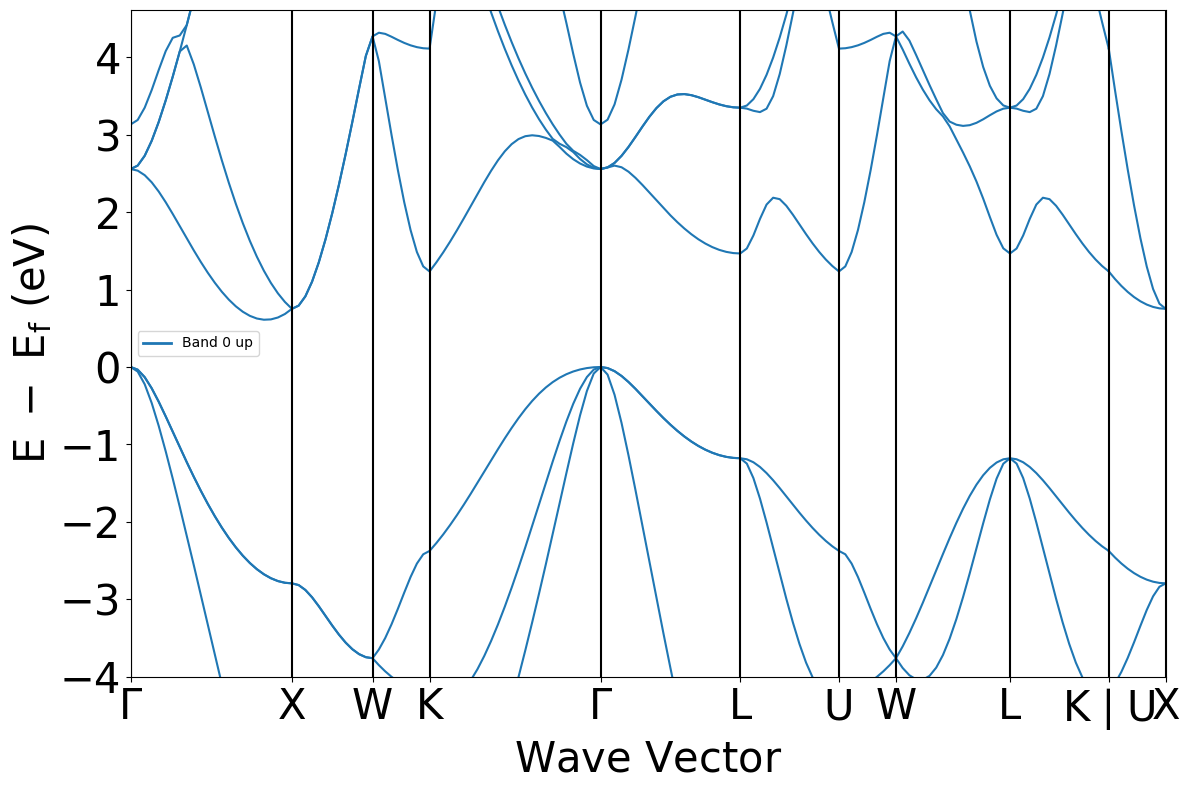

In [ ]:
from pymatgen.electronic_structure.plotter import BSPlotter
def plot_bandstructure(bs):
  BSPlotter(bs).get_plot().show()
plot_bandstructure(bs)

In [ ]:
with MPRester(mp_api_key) as mpr:
  l = mpr.get_materials_ids("Li-Fe-P-O")
print(l)

Retrieving MaterialsDoc documents:   0%|          | 0/382 [00:00<?, ?it/s]

[MPID(mp-6373), MPID(mp-18951), MPID(mp-19017), MPID(mp-19294), MPID(mp-19430), MPID(mp-25809), MPID(mp-25813), MPID(mp-25825), MPID(mp-25845), MPID(mp-25883), MPID(mp-25961), MPID(mp-25963), MPID(mp-25977), MPID(mp-25993), MPID(mp-26003), MPID(mp-26025), MPID(mp-26041), MPID(mp-26049), MPID(mp-26054), MPID(mp-26056), MPID(mp-26069), MPID(mp-26070), MPID(mp-26077), MPID(mp-26125), MPID(mp-26126), MPID(mp-26181), MPID(mp-26184), MPID(mp-26221), MPID(mp-26255), MPID(mp-26269), MPID(mp-26307), MPID(mp-26326), MPID(mp-26335), MPID(mp-26358), MPID(mp-26471), MPID(mp-26546), MPID(mp-26559), MPID(mp-26563), MPID(mp-26575), MPID(mp-26576), MPID(mp-26581), MPID(mp-26611), MPID(mp-26613), MPID(mp-26643), MPID(mp-26677), MPID(mp-26703), MPID(mp-26717), MPID(mp-26749), MPID(mp-26773), MPID(mp-26789), MPID(mp-26791), MPID(mp-26805), MPID(mp-26807), MPID(mp-26811), MPID(mp-26825), MPID(mp-26901), MPID(mp-26902), MPID(mp-26985), MPID(mp-27007), MPID(mp-27027), MPID(mp-27081), MPID(mp-31815), MPID(mp-

In [ ]:


# Replace 'YOUR_API_KEY' with your actual Materials Project API key


with MPRester(mp_api_key) as mpr:
    # Get entries for a specific material
    entries = mpr.get_entries("mp-4163")

    # Print information about the entries
    for entry in entries:
        print("Entry ID:", entry.entry_id)
        print("Energy:", entry.energy)
        print("Energy per Atom:", entry.energy_per_atom)
        print("Composition:", entry.composition)
        print("Formula:", entry.composition.reduced_formula)
        print("\n")


Retrieving ThermoDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Entry ID: mp-4163-R2SCAN
Energy: -259.20610289
Energy per Atom: -10.800254287083334
Composition: Ca6 Ti4 O14
Formula: Ca3Ti2O7


Entry ID: mp-4163-GGA
Energy: -197.17139681999998
Energy per Atom: -8.2154748675
Composition: Ca6 Ti4 O14
Formula: Ca3Ti2O7


Entry ID: mp-4163-R2SCAN
Energy: -259.20610289
Energy per Atom: -10.800254287083334
Composition: Ca6 Ti4 O14
Formula: Ca3Ti2O7




In [ ]:
def get_task_ids_associated_with_material_id(material_id):
    with MPRester(mp_api_key) as mpr:
        # Get entries for the specified material ID
        entries = mpr.get_entries(material_id)

        # Extract task IDs from the entries
        task_ids = [entry.entry_id for entry in entries]

        return task_ids

# Specify the material ID for which you want to get task IDs
material_id_to_query = "mp-4163"

# Get and print task IDs associated with the specified material ID
task_ids = get_task_ids_associated_with_material_id(material_id_to_query)
print(f"Task IDs associated with material ID {material_id_to_query}:")
print(task_ids)


Retrieving ThermoDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Task IDs associated with material ID mp-4163:
['mp-4163-R2SCAN', 'mp-4163-GGA', 'mp-4163-R2SCAN']


In [ ]:
material_id_to_query = "mp-4163"

with MPRester(mp_api_key) as mpr:
    # Get the structure for the specified material ID
    structure = mpr.get_structure_by_material_id(material_id_to_query)

    # Print information about the structure
    print("Structure:")
    print(structure)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Structure:
Full Formula (Ca6 Ti4 O14)
Reduced Formula: Ca3Ti2O7
abc   :  10.091556  10.091556   5.456510
angles:  90.000000  90.000000 148.869906
pbc   :       True       True       True
Sites (24)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Ca    0.254195  0.254195  0.961586         0
  1  Ca    0.745805  0.745805  0.461586         0
  2  Ca    0.554216  0.929183  0.537123        -0
  3  Ca    0.445784  0.070817  0.037123        -0
  4  Ca    0.929183  0.554216  0.537123        -0
  5  Ca    0.070817  0.445784  0.037123        -0
  6  Ti    0.15031   0.349355  0.504085        -0
  7  Ti    0.84969   0.650645  0.004085        -0
  8  Ti    0.650645  0.84969   0.004085        -0
  9  Ti    0.349355  0.15031   0.504085        -0
 10  O     0.150996  0.927245  0.786476         0
 11  O     0.849004  0.072755  0.286476         0
 12  O     0.072755  0.849004  0.286476         0
 13  O     0.927245  0.150996  0.786476         0
 1

In [ ]:
material_id_to_query = "mp-4163"

with MPRester(mp_api_key) as mpr:
    # Get structures for the specified material ID
    structures = mpr.get_structures(material_id_to_query)

    # Print information about the structures
    for idx, structure in enumerate(structures):
        print(f"Structure {idx + 1}:")
        print(structure)
        print("\n")

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

In [ ]:
with MPRester(mp_api_key) as mpr:
    # Find structures using a one-liner
    structures = mpr.summary.search({"pretty_formula": "SiO2", "spacegroup.number": {"$in": [160, 161]}}, ["material_id", "structure"])

    # Print information about the found structures
    for idx, entry in enumerate(structures):
        material_id = entry["material_id"]
        structure = entry["structure"]

        print(f"Structure {idx + 1} (Material ID: {material_id}):")
        print(structure)
        print("\n")

<ipython-input-104-faa66ad02941>:3: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  structures = mpr.summary.search({"pretty_formula": "SiO2", "spacegroup.number": {"$in": [160, 161]}}, ["material_id", "structure"])


KeyError: ignored

In [ ]:
material_id_to_query = "mp-4163"
with MPRester(mp_api_key) as mpr:
    # Get entries for the specified material ID
    entries = mpr.get_entry_by_material_id(material_id_to_query)

    # Check if entries were returned
    if entries:
        # Access the first entry in the list
        entry = entries[0]

        # Print information about the entry
        print("Entry ID:", entry.entry_id)
        print("Energy:", entry.energy)
        print("Energy per Atom:", entry.energy_per_atom)
        print("Composition:", entry.composition)
        print("Formula:", entry.composition.reduced_formula)
        # Add more properties as needed
    else:
        print(f"No entry found for material ID: {material_id_to_query}")

Retrieving ThermoDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Entry ID: mp-4163-R2SCAN
Energy: -259.20610289
Energy per Atom: -10.800254287083334
Composition: Ca6 Ti4 O14
Formula: Ca3Ti2O7


In [ ]:
chemsys_to_query = "Ca-Ti-O"

with MPRester(mp_api_key) as mpr:
    # Get entries for the specified chemical system
    entries = mpr.get_entries_in_chemsys(chemsys_to_query)

    # Print information about the entries
    for idx, entry in enumerate(entries):
        print(f"Entry {idx + 1} - Entry ID: {entry.entry_id}")
        print("Composition:", entry.composition)
        print("Energy:", entry.energy)
        print("Energy per Atom:", entry.energy_per_atom)
        print("\n")

Retrieving ThermoDoc documents:   0%|          | 0/225 [00:00<?, ?it/s]

Entry 1 - Entry ID: mp-1064227-GGA
Composition: Ca2
Energy: -3.99692089
Energy per Atom: -1.998460445


Entry 2 - Entry ID: mp-166-GGA
Composition: Ca1
Energy: -1.98438209
Energy per Atom: -1.98438209


Entry 3 - Entry ID: mp-1078638-GGA
Composition: Ca8
Energy: -15.89158303
Energy per Atom: -1.98644787875


Entry 4 - Entry ID: mp-1227541-GGA
Composition: Ca1
Energy: -1.03268839
Energy per Atom: -1.03268839


Entry 5 - Entry ID: mp-132-GGA
Composition: Ca2
Energy: -3.99937997
Energy per Atom: -1.999689985


Entry 6 - Entry ID: mp-1067285-GGA
Composition: Ca4
Energy: -6.91507784
Energy per Atom: -1.72876946


Entry 7 - Entry ID: mp-1008498-GGA
Composition: Ca4
Energy: -7.36275945
Energy per Atom: -1.8406898625


Entry 8 - Entry ID: mp-45-GGA
Composition: Ca1
Energy: -2.00559988
Energy per Atom: -2.00559988


Entry 9 - Entry ID: mp-21-GGA
Composition: Ca1
Energy: -1.98205783
Energy per Atom: -1.98205783


Entry 10 - Entry ID: mp-10683-GGA
Composition: Ca1
Energy: -1.60598638
Energy per A

In [ ]:
import pandas as pd


def get_entries_and_create_dataframe(api_key, chemsys):
    with MPRester(api_key) as mpr:

        entries = mpr.get_entries_in_chemsys(chemsys)


        entry_data = []


        for entry in entries:
            entry_info = {
                "Entry ID": entry.entry_id,
                "Composition": entry.composition.reduced_formula,
                "Energy": entry.energy,
                "Energy per Atom": entry.energy_per_atom

            }
            entry_data.append(entry_info)


        df = pd.DataFrame(entry_data)

    return df
chemsys_to_query = "Ca-Ti-O"


result_df = get_entries_and_create_dataframe(mp_api_key, chemsys_to_query)
print(result_df)

Retrieving ThermoDoc documents:   0%|          | 0/225 [00:00<?, ?it/s]

           Entry ID Composition      Energy  Energy per Atom
0    mp-1064227-GGA          Ca   -3.996921        -1.998460
1        mp-166-GGA          Ca   -1.984382        -1.984382
2    mp-1078638-GGA          Ca  -15.891583        -1.986448
3    mp-1227541-GGA          Ca   -1.032688        -1.032688
4        mp-132-GGA          Ca   -3.999380        -1.999690
..              ...         ...         ...              ...
220      mp-390-GGA        TiO2  -56.554269        -9.425711
221     mp-1147-GGA       Ti3O5 -150.931650        -9.433228
222  mp-1045643-GGA      Ti9O13 -204.172137        -9.280552
223  mp-1217105-GGA       Ti3O8  -90.689043        -8.244458
224   mp-759754-GGA     Ti11O14 -233.577708        -9.343108

[225 rows x 4 columns]


In [ ]:
def get_bandstructure_and_create_dataframe(api_key, material_id):
    with MPRester(api_key) as mpr:

        bandstructure = mpr.get_bandstructure_by_material_id(material_id)

        bandstructure_info = {
            "Material ID": material_id,
            "Band Gap": bandstructure.get_band_gap(),
            "CBM Energy": bandstructure.get_cbm()["energy"],
            "VBM Energy": bandstructure.get_vbm()["energy"],

        }


        df = pd.DataFrame([bandstructure_info])

    return df




material_id_to_query = "mp-4163"


result_df = get_bandstructure_and_create_dataframe(mp_api_key, material_id_to_query)
print(result_df)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

  Material ID                                           Band Gap  CBM Energy  \
0     mp-4163  {'direct': False, 'energy': 2.5302000000000002...      5.1814   

   VBM Energy  
0      2.6512  
